In [42]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [43]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
#df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [44]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4351
1.0      76
Name: count, dtype: int64

In [ ]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [ ]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
print(test_data_scaled.shape)


(3541, 100)
(886, 100)


In [95]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values

In [102]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       876, 877, 878, 879, 880, 881, 882, 883, 884, 885],
      dtype='int64', length=875)
Index([43, 62, 110, 229, 563, 577, 663, 668, 677, 787, 793], dtype='int64')


In [103]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

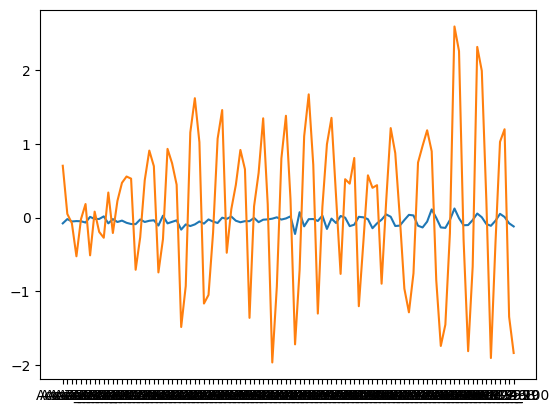

In [104]:
#See normal data ecg
plt.plot(normal_train_data_scaled.iloc[0])
plt.plot(normal_train_data_scaled.iloc[1])
# plt.plot(normal_train_data_scaled[2])
# plt.plot(normal_train_data_scaled[500])
# plt.plot(normal_train_data_scaled[600])

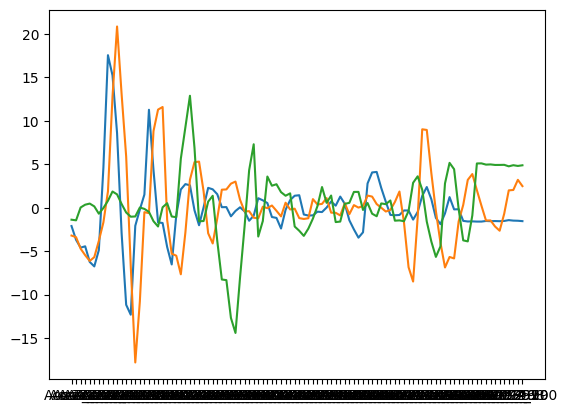

In [105]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled.iloc[10])
plt.plot(abnormal_train_data_scaled.iloc[20])
plt.plot(abnormal_train_data_scaled.iloc[30])


In [106]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(32, activation='tanh'),
            tf.keras.layers.Dense(16, activation='tanh'),
            tf.keras.layers.Dense(8, activation='tanh')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='tanh'),
            tf.keras.layers.Dense(32, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded
    

In [107]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [108]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=100, batch_size=256,
                    validation_split=0.3, 
                    shuffle=True, callbacks=[early_stopping])

# # Save the entire model to a file
# model.save("../../models/autoencoder_handlebar.h5")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.5607 - val_loss: 0.5537
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5320 - val_loss: 0.5377
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5221 - val_loss: 0.5218
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5110 - val_loss: 0.5080
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4966 - val_loss: 0.4974
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4814 - val_loss: 0.4894
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4721 - val_loss: 0.4836
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4656 - val_loss: 0.4786
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4598 - val_loss: 0.4748
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4453 - val_loss: 0.4715
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4620 - val_loss: 0.4686
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

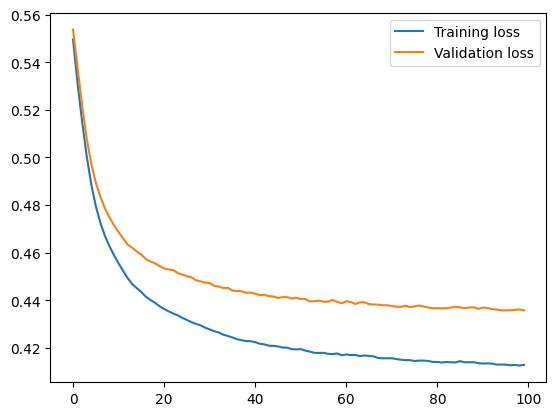

In [109]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

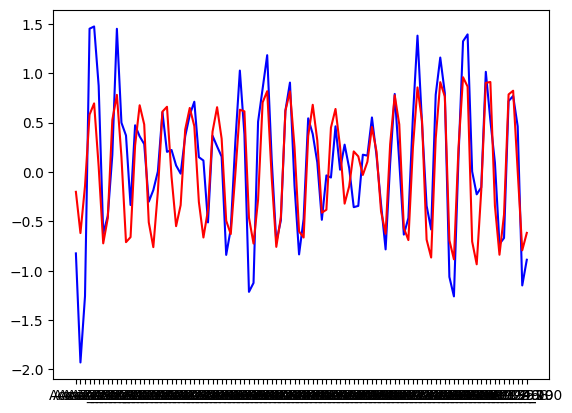

In [111]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[200], 'blue')
plt.plot(decoder_out[200], 'red')

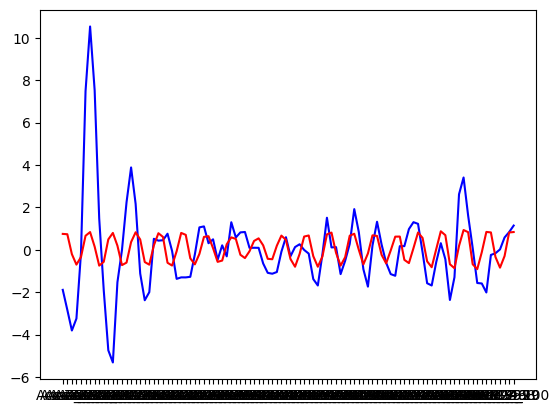

In [112]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([232.,  23.,   9.,  16.,   5.,   1.,   1.,   3.,   2.,   7.,  26.,
         35.,  43.,  40.,  52.,  47.,  35.,  31.,  35.,  26.,  26.,  26.,
         17.,  23.,  13.,  20.,  11.,   9.,  12.,   7.,   8.,   3.,   6.,
          6.,   4.,   3.,   1.,   1.,   0.,   3.,   1.,   1.,   1.,   1.,
          1.,   0.,   0.,   0.,   0.,   2.]),
 array([0.00429238, 0.03615908, 0.06802579, 0.0998925 , 0.1317592 ,
        0.1636259 , 0.19549261, 0.22735932, 0.25922602, 0.29109272,
        0.32295942, 0.35482615, 0.38669285, 0.41855955, 0.45042628,
        0.48229298, 0.51415968, 0.54602641, 0.57789308, 0.60975981,
        0.64162648, 0.67349321, 0.70535994, 0.73722661, 0.76909333,
        0.80096006, 0.83282673, 0.86469346, 0.89656019, 0.92842686,
        0.96029359, 0.99216026, 1.02402699, 1.05589366, 1.08776045,
        1.11962712, 1.15149379, 1.18336058, 1.21522725, 1.24709392,
        1.27896059, 1.31082737, 1.34269404, 1.37456071, 1.4064275 ,
        1.43829417, 1.47016084, 1.50202763, 1.

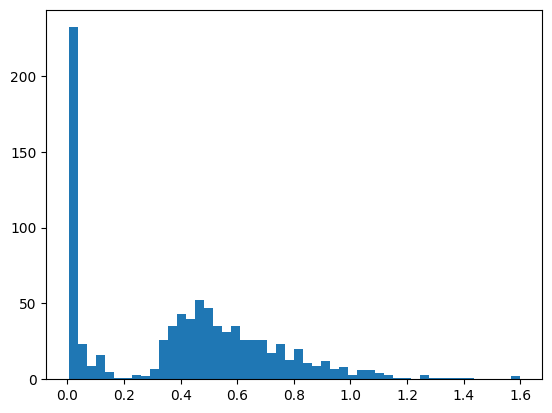

In [114]:
#Plot error for normal test data
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss_normal = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss_normal, bins=50)

In [134]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss_normal) + 2.5*np.std(train_loss_normal)
threshold

np.float32(1.2264463)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.3025409 , 1.34066391, 1.37878692, 1.41691005, 1.45503306,
        1.49315608, 1.53127909, 1.5694021 , 1.60752511, 1.64564824,
        1.68377125, 1.72189426, 1.76001728, 1.79814029, 1.83626342,
        1.87438643, 1.91250944, 1.95063245, 1.98875546, 2.0268786 ,
        2.06500149, 2.10312462, 2.14124775, 2.17937064, 2.21749377,
        2.25561666, 2.2937398 , 2.33186293, 2.36998582, 2.40810871,
        2.44623184, 2.48435497, 2.5224781 , 2.560601  , 2.59872389,
        2.63684702, 2.67497015, 2.71309328, 2.75121617, 2.78933907,
        2.8274622 , 2.86558533, 2.90370846, 2.94183135, 2.97995424,
        3.01807737, 3.0562005 , 3.09432364, 3.13244653, 3.17056942,
        3.20869255]),
 <BarContainer object of 50 artists>)

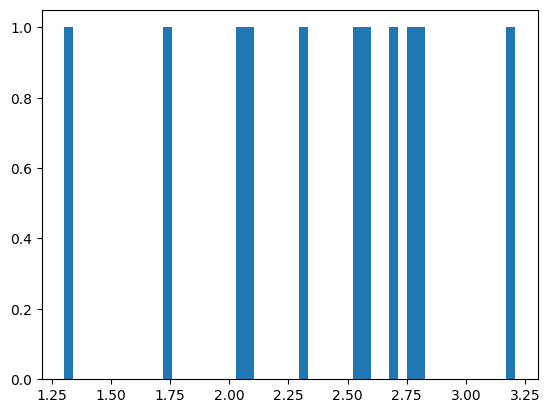

In [135]:
#Plot error for abnormal test data
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

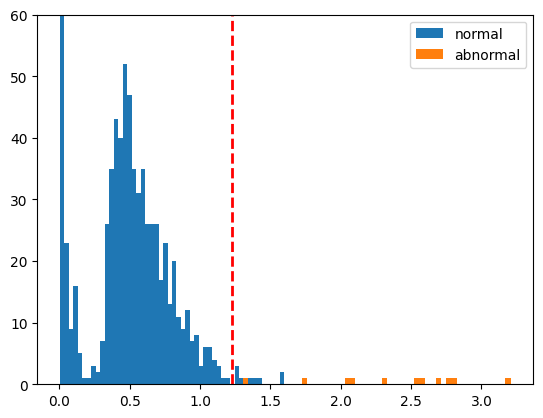

In [137]:
plt.hist(train_loss_normal, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [138]:
preds_normal=tf.math.less(train_loss_normal, threshold)
#booloean 1 is True, 0 is False
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  865
Accuracy:  0.9885714285714285
False Predictions index:  [28, 30, 162, 277, 372, 561, 770, 788, 796, 845]


In [139]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))
print("False Predictions index: ", false_predictions_abnormal)

Correct Predictions:  11
Accuracy:  1.0
False Predictions index:  []


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


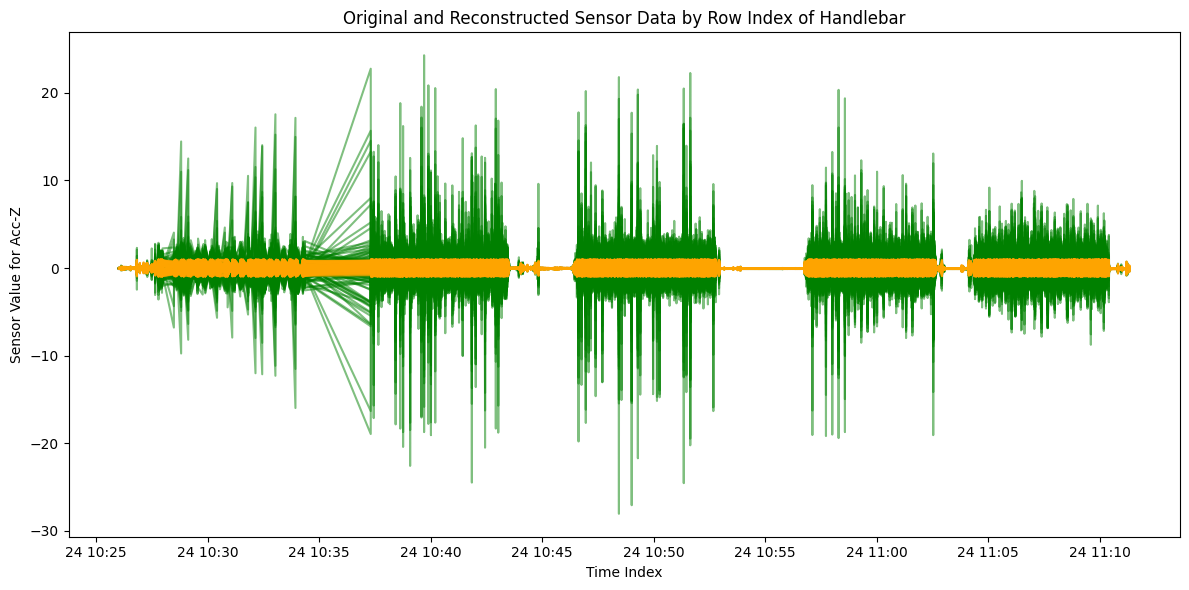

In [94]:
# reconstruct whole data using autoencoder for plotting
# 1. Combine the three DataFrames into one
combined_df = pd.concat([
    train_data_scaled_df,
    test_data_scaled_df,
], ignore_index=True)

# 2. Convert 'start_time' to datetime if it's not already
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# 3. Sort by the 'start_time' column
combined_df.sort_values('start_time', inplace=True)

# 4. Set 'start_time' as the index
combined_df.set_index('start_time', inplace=True)

# reconstruct data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in combined_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = combined_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Use a single color for all lines
color_original = 'green'
color_reconstructed = 'orange'

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, sensor_data[:, i], color=color_original, alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, reconstructed_data[:, i], color=color_reconstructed, alpha=0.5)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


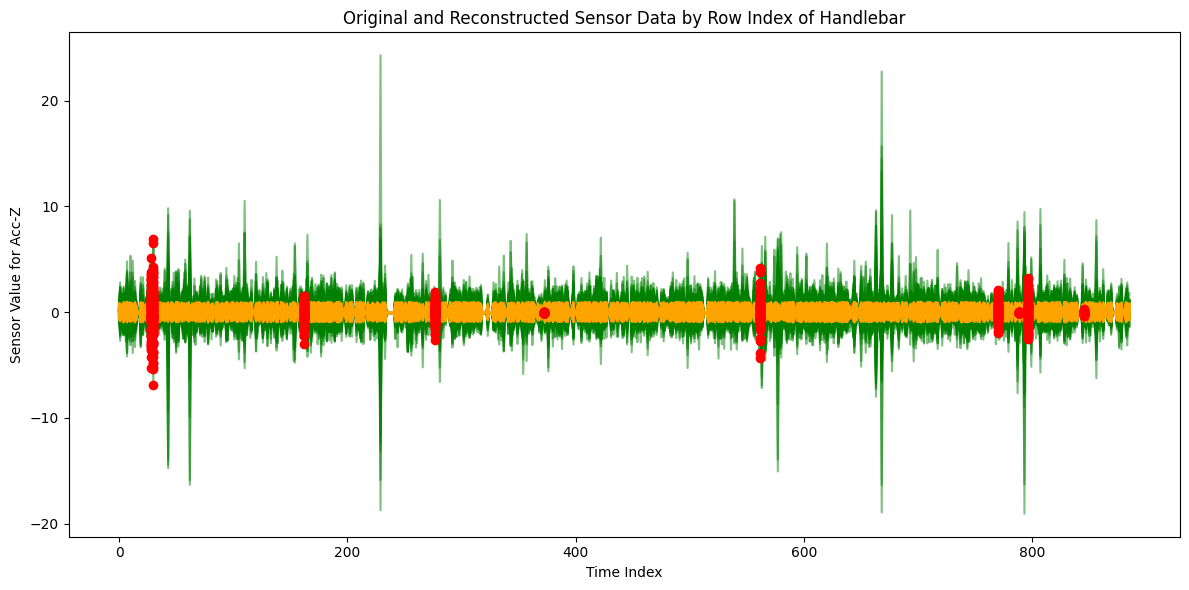

In [144]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)
# for i in false_predictions_abnormal:
#     plt.plot(test_data_scaled_df.index[i], sensor_data[:, i], color='red', alpha=0.5)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()